In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# importamos los datos

datos = pd.read_csv("planea_2017_Hidalgo.csv")
datos.head()

,NOFOLIO,ENTIDAD,CCT,GENERO,NOMBRE_CT,N_TURNO,EXTENSION,NOMBRE_MUN,NOMBRE_LOC,MARGINA,SOST,SUBSIST,NVL_ESP,NVL_MAT,Unnamed: 14
0,130000001B17,HIDALGO,13DCT0005G,H,CBTIS 199,MATUTINO,NaN,MIXQUIAHUALA DE JUAREZ,MIXQUIAHUALA,MUY BAJO,FEDERAL,DGETI,II,8,NaN
1,130000002B17,HIDALGO,13DCT0005G,M,CBTIS 199,MATUTINO,NaN,MIXQUIAHUALA DE JUAREZ,MIXQUIAHUALA,MUY BAJO,FEDERAL,DGETI,III,IV,NaN
2,130000003B17,HIDALGO,13DCT0005G,M,CBTIS 199,MATUTINO,NaN,MIXQUIAHUALA DE JUAREZ,MIXQUIAHUALA,MUY BAJO,FEDERAL,DGETI,8,IV,NaN
3,130000004B17,HIDALGO,13DCT0005G,H,CBTIS 199,MATUTINO,NaN,MIXQUIAHUALA DE JUAREZ,MIXQUIAHUALA,MUY BAJO,FEDERAL,DGETI,II,I,NaN
4,130000005B17,HIDALGO,13DCT0005G,H,CBTIS 199,MATUTINO,NaN,MIXQUIAHUALA DE JUAREZ,MIXQUIAHUALA,MUY BAJO,FEDERAL,DGETI,IV,IV,NaN


In [0]:
# Eliminamos la última columna, pues no tiene información
datos = datos.drop(['Unnamed: 14'], axis=1)
# Visualizamos las variables que tiene cada registro
list(datos)

['NOFOLIO',
 'ENTIDAD',
 'CCT',
 'GENERO',
 'NOMBRE_CT                                                                                               ',
 'N_TURNO',
 'EXTENSION',
 'NOMBRE_MUN',
 'NOMBRE_LOC',
 'MARGINA',
 'SOST',
 'SUBSIST',
 'NVL_ESP',
 'NVL_MAT']

In [0]:
# Vemos cuántas filas hay

len(datos)

12766

In [0]:
# Eliminamos los registros con incosistencias en las últimas dos columnas
# Guardamos los índices de las filas en las que tienen un nivel en español o en matemáticas erróneo

nivel_incorrecto = []
for i in range(len(datos)):
    if datos.NVL_ESP[i] == '8' or datos.NVL_MAT[i] == '8':
        nivel_incorrecto.append(i)
    

In [0]:
datos = datos.drop(nivel_incorrecto,axis=0)

In [0]:
len(datos)

12300

In [0]:
# Verificamos si hay nulos 

datos.isnull().sum()

NOFOLIO                                                                                                         0
ENTIDAD                                                                                                         0
CCT                                                                                                             0
GENERO                                                                                                          0
NOMBRE_CT                                                                                                       0
N_TURNO                                                                                                         0
EXTENSION                                                                                                   12255
NOMBRE_MUN                                                                                                      0
NOMBRE_LOC                                                                              

In [0]:
# Para fines del proyecto, eliminamos las columnas ENTIDAD y EXTENSION

datos = datos.drop(['ENTIDAD','EXTENSION'], axis=1)


In [0]:
datos.head()

,NOFOLIO,CCT,GENERO,NOMBRE_CT,N_TURNO,NOMBRE_MUN,NOMBRE_LOC,MARGINA,SOST,SUBSIST,NVL_ESP,NVL_MAT
1,130000002B17,13DCT0005G,M,CBTIS 199,MATUTINO,MIXQUIAHUALA DE JUAREZ,MIXQUIAHUALA,MUY BAJO,FEDERAL,DGETI,III,IV
3,130000004B17,13DCT0005G,H,CBTIS 199,MATUTINO,MIXQUIAHUALA DE JUAREZ,MIXQUIAHUALA,MUY BAJO,FEDERAL,DGETI,II,I
4,130000005B17,13DCT0005G,H,CBTIS 199,MATUTINO,MIXQUIAHUALA DE JUAREZ,MIXQUIAHUALA,MUY BAJO,FEDERAL,DGETI,IV,IV
5,130000006B17,13DCT0005G,H,CBTIS 199,MATUTINO,MIXQUIAHUALA DE JUAREZ,MIXQUIAHUALA,MUY BAJO,FEDERAL,DGETI,II,III
6,130000008B17,13DCT0005G,H,CBTIS 199,MATUTINO,MIXQUIAHUALA DE JUAREZ,MIXQUIAHUALA,MUY BAJO,FEDERAL,DGETI,III,III


In [0]:
def frecuenciasPorGrupo(datos,nombre_columna):
    """
    Agrupa todos las categorías (grupos) de una variable y cuenta la ocurrencia 
    Parámetros:
        datos(pandas.DataFrame): Dataframe (marco de datos)
        nombre_columna(string): Nombre de alguna de las columnas del Dataframe (marco de datos)
    Retorna:
        cantidad_por_grupos(pandas.core.series.Series): frecuencia de cada categoría de una 
        columna (variable)
    """
    # Agrugamos la frecuencia de cada categoría de una columna (variable)
    cantidad_por_grupos = datos.groupby(nombre_columna)[nombre_columna].count()
    return cantidad_por_grupos

def porcentajesPorGrupo(datos,nombre_columna,categorias):
    """
    Nos permite consultar los porcentajes de las categorías (grupo) de una variable
    en los niveles (I,II,III,IV) de ambas materias (Español y Matemáticas)
    Parámetros:
        datos(pandas.DataFrame): Dataframe (marco de datos)
        nombre_columna(string): Nombre de alguna de las columnas del Dataframe (marco de datos)
        categorias(list): Cada entrada es el nombre de todas las categorías de la columna.
    Retorna: 
       [resultados_esp,resultados_mat](list): lista de dos arreglos de arreglos, donde la 
       primera entrada es la lista de arreglos de los resultados de Español en cada categoría 
       en sus correspondientes niveles de logro; mientras que la segunda entrada es la lista de 
       arreglos de los resultados de Matemáticas en cada categoría en sus correspondientes 
       niveles de logro
    """
    # Guardamos en una lista los porcentajes  de los niveles de logro de cada categoría
    # en una materia (Por eso usaremos dos listas, porque son dos materias: Español y Matemáticas)
    # Por ejemplo, para la primera categoría de la variable, obtenemos una lista con cuatro
    # elementos; digamos que es de este estilo: [50,25,15,10], cada entrada corresponde
    # a los niveles I,II,III,IV respectivamente de la determinada materia.
    # Es por eso que para cada materia, guardamos tantos arreglos como categorías haya en la
    # variable, en el que cada arreglo tendrá x entradas que son los niveles de logro; y que en nuestro 
    # caso, x es 4.
    resultados_esp = []
    resultados_mat = []
    for i in range(len(categorias)):
        # Agrupamos cada categoria de la variable (nombre de la columna)
        registros_categorias = datos[(datos[nombre_columna] == categorias[i])]
        # Obtenemos la frecuencia de cada nivel de logro de la categoría correspondiente en la 
        # materia de Español
        consulta_categorias_esp = registros_categorias.groupby('NVL_ESP')['NVL_ESP'].count()
        # Obtenemos la frecuencia de cada nivel de logro de la categoría correspondiente en la 
        # materia de Matemáticas
        consulta_categorias_mat = registros_categorias.groupby('NVL_MAT')['NVL_MAT'].count()
        # Convertimos la frecuencia de cada nivel de logro de la categoría correspondiente en 
        # la materia de Español, tal manera que las obtengamos como porcentaje
        total_categorias_esp = sum(list(consulta_categorias_esp))
        categorias_esp = list(np.array(consulta_categorias_esp)/total_categorias_esp*100)
        # Convertimos la frecuencia de cada nivel de logro de la categoría correspondiente en 
        # la materia de Matemáticas, tal manera que las obtengamos como porcentaje
        total_categorias_mat = sum(list(consulta_categorias_mat))
        categorias_mat = list(np.array(consulta_categorias_mat)/total_categorias_mat*100)
        # Agregamos a esta lista los porcentajes de los niveles de logro de la materia de 
        # Español de cada categoría. Entonces esta es una lista de arreglos, donde cada lista
        # corresponde entonces a los niveles de logro de la respectiva categoría.
        resultados_esp.append(np.array(categorias_esp))
        # Agregamos a esta lista los porcentajes de los niveles de logro de la materia de 
        # Matemáticas de cada categoría.Entonces esta es una lista de arreglos, donde cada lista
        # corresponde entonces a los niveles de logro de la respectiva categoría.
        resultados_mat.append(np.array(categorias_mat))

    # Retornamos una lista de dos arreglos de arreglos: la primera entrada es la lista de arreglos 
    # de los resultados de Español en cada categoría en sus correspondientes niveles de logro; 
    # mientras que la segunda entrada es la lista de arreglos de los resultados de Matemáticas
    # en cada categoría en sus correspondientes niveles de logro
    return [resultados_esp,resultados_mat]

def graficadeDeBarrasApiladaEnPorcentaje(materias,porcentajes_niveles,colores,niveles,tamanio_figura=(12,9),anchura_barras=0.75):
    """
    Muestra una gráfica de barras apiladas con el porcentaje de cada valor (que en nuestro caso, 
    son los niveles de logro) con respecto a la cantidad total en cada materia (el total es el 100%). 
    Esto facilita ver las diferencias relativas entre cantidades en cada grupo y nivel de logro.
    Parámetros:
        materias(list): Nombre de las materias (Español y Matemáticas)
        porcentaje_niveles(list): Cada entrada de la lista debe contener una lista con el porcentaje 
        de cada nivel de logro en cada materia
        colores(list): Colores de cada nivel de logro
        niveles(list): Niveles de logro, los cuales se usarán para etiquetar la leyenda
        tamanio_figura(tuple): Tamaño de la figura (gráfica), que por defecto es (12,9).
        anchura_barras(float): Anchura de la barra; que por defecto es 0.75.  
    """
    # Estos variables nos permitirán indicar las coordenadas 'Y' de las bases de las barras
    acum1 = list(np.array(porcentajes_niveles[0])+np.array(porcentajes_niveles[1]))
    acum2 = list(np.array(porcentajes_niveles[0])+np.array(porcentajes_niveles[1])+np.array(porcentajes_niveles[2]))

    # Inicializamos la fugura, indicando su tamaño y la anchura de las barras
    plt.figure(figsize=tamanio_figura)
    width = anchura_barras  

    # Graficamos la frecuencia (en porcentaje) de cada en nivel en cada categoría (Español y 
    # Matemáticas en nuestro caso), indicando las coordenadas 'Y' de las bases de las barras,
    # ya que son barras apiladas en porcentaje
    ax1 = plt.bar(materias, nivel_1, width, label=niveles[0], color = colores[0])
    ax2 = plt.bar(materias, nivel_2, width, bottom=porcentajes_niveles[0], label=niveles[1], color = colores[1])
    ax3 = plt.bar(materias, nivel_3, width, bottom=acum1, label=niveles[2], color = colores[2])
    ax4 = plt.bar(materias, nivel_4, width, bottom=acum2, label=niveles[3], color =colores[3])
    plt.legend(title='Niveles', fontsize=12)

    # El siguiente ciclo es para ponerle el porcentaje como texto a cada barra de cada categoría 
    # (En nuestro caso, para ponerle el porcentaje de cada nivel en las dos materias)
    for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
        h1 = r1.get_height()
        h2 = r2.get_height()
        h3 = r3.get_height()
        h4 = r4.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%.2f" % h1+"%", ha="center", va="center", color="white", fontsize=16, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%.2f" % h2+"%", ha="center", va="center", color="white", fontsize=16, fontweight="bold")
        plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%.2f" % h3+"%", ha="center", va="center", color="white", fontsize=16, fontweight="bold")
        plt.text(r4.get_x() + r4.get_width() / 2., h1 + h2 + h3 + h4 / 2., "%.2f" % h4+"%", ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.ylabel('Porcentajes',fontsize=18)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=18)
    plt.title('Porcentajes de los niveles por materias',fontsize=22)
    plt.show()


def histograma(frecuencias_variable,titulo,titulo_izquierda,titulo_derecha,y_lim,tamanio_figura=(9,7),anchura_barras=0.4,color_menor='#B2B1B9',color_mayor='#A08481',rotacion='vertical',posicion_altura=3.0):
    """
    Muestra un histograma, en el que cada barra representa la frecuencia de cada categoría de una variable.
    Parámetros:
        frecuencias_variable(pandas.core.series.Series): Una serie que contiene la frecuencia de cada
                                                         categoría de una variable.
        titulo(string): Título general de la gráfica.
        titulo_izquierda(string): Título a la izquierda de la gráfica
        titulo_derecha(string): Título a la izquierda de la gráfica
        y_lim(float): Límite del eje Y.
        tamanio_figura(tuple): Tamaño de la figura (gráfica), que por defecto es (12,9).
        anchura_barras(float): Anchura de la barra; que por defecto es 0.4.
        color_menor(string): Color de la primera mitad de las barras del histograma; que por defecto es 
        #B2B1B9, el cual, según la psicología del color, es usado para reflexionar.
        color_mayor(string): Color de la segunda mitad de las barras del histograma; que por defecto es 
        #A08481, el cual, según la psicología del color, es usado para representar valor.
        rotacion(string o float): Rotación de las xticks; que por defecto es 'vertical'.
        posicion_altura(float): Posición en altura de los porcentajes (en texto) de cada barra; que por defecto es 3.0.
    """

    # Obtenemos las llaves (es decir, todas las categorías de la variable)
    llaves = list(frecuencias_variable.keys())

    # Creamos una lista vacía en la que vamos a irle agregando la frecuencia de cada categoría
    valores = []
    for frecuencias in frecuencias_variable:
        valores.append(frecuencias)
    # Creamos una secuencia de numeros que nos permitirá poner el nombre de cada categoría en los xticks
    grupos = np.arange(0,len(frecuencias_variable),1)

    # Graficamos, indicando el tamaño de la figura y que serán barras, ademas del color de las barras
    plt.figure(figsize=tamanio_figura)
    lista_barras = plt.bar(llaves, valores,anchura_barras, color=color_mayor)
    # a la primera miata le indicamos que va de otro color
    for j in range(len(lista_barras)//2):
        lista_barras[j].set_color(color_menor)

    # Le ponemos a cada barra (es decir, a cada categoría) su frecuencia en número como texto
    for i, v in enumerate(valores):
        plt.text(grupos[i]-0.25, v + posicion_altura, str(v), fontsize=12,rotation=0)

    
    plt.suptitle(titulo,fontsize=24)
    plt.title(titulo_izquierda, loc='left')
    plt.title(titulo_derecha, loc='right')
    plt.ylabel("Total de estudiantes",fontsize=18)
     # En nuestro caso, las etiquetas de cada xtick van a ser los nombres de las categorías de la variable
    plt.xticks(ticks=grupos, labels=llaves,rotation=rotacion,fontsize=14)
    plt.ylim(0,y_lim)
    plt.yticks(fontsize=14)
    plt.show()


def histogramaPorcentajeMunicipiosPorNivel(datos,materia,nivel,municipio,y_lim,color_menor,color_mayor,tamanio_figura=(10,7),anchura_barras=0.4,rotacion='vertical',posicion_altura=3.5,posicion_lados=-0.5):
    """
    Este método está diseñado específicamente para visualizar gráficamente, por medio de un 
    histograma, la frecuencia en porcentaje (ascendentemente) de los primeros y últimos 10 municipios
    (con mayor y menor porcentaje).
    Parámetros:
        datos(pandas.DataFrame): Dataframe (marco de datos).
        materia(string): Nombre de la materia (Español o Matemáticas).
        nivel(string): Nivel de Logro (I, II, III o IV).
        municipio(pandas.core.series.Series): Frecuencia de ocurrencia de cada municipio.
        y_lim(float): Límite del eje Y.
        color_menor(string): Color de la primera mitad de las barras del histograma.
        color_mayor(string): Color de la segunda mitad de las barras del histograma.
        tamanio_figura(tuple): Tamaño de la figura (gráfica), que por defecto es (10,7).
        anchura_barras(float): Anchura de la barra; que por defecto es 0.75.
        rotacion(string o float): Rotación de las xticks; que por defecto es 'vertical'
        posicion_altura(float): Posición en altura de los porcentajes (en texto) de cada barra; que por defecto es 3.5.
        posicion_lados(float): Posición en lados de los porcentajes (en texto) de cada barra; que por defecto es -0.5.
    """
    # Hacemos el proceso dependiendo de la materia, para que podamos agrupar por medio de la materia
    if materia == "Español":
        # En caso de que hayamos querido hacer el proceso para la materia de Español,
        # aquí seleccionamos los alumnos que tienen el respectivo nivel que brindó el 
        # usuario en dicha materia
        alumnos = datos[(datos.NVL_ESP == nivel)]
    else:
        # En caso de que hayamos querido hacer el proceso para la materia de Matemáticas,
        # aquí seleccionamos los alumnos que tienen el respectivo nivel que brindó el 
        # usuario en dicha materia
        alumnos = datos[(datos.NVL_MAT == nivel)]

    # Obtenemos la frecuencia de cada municipio, de la materia y el nivel indicado   
    frecuencias_alumnos = alumnos.groupby('NOMBRE_MUN')['NOMBRE_MUN'].count()
    frecuencias_alumnos = frecuencias_alumnos.sort_values()

    # Obtenemos los nombres de las categorías, esto es, los nombres de los municipios que
    # se encuentran en ese nivel
    llaves_municipio_nivel = list(frecuencias_alumnos.keys())

    # Obtenemos la lista completa de los nombre de todos los municipios que aparecen en el
    # dataframe, esto para obtener los pocerntajes de cada municipio en cada nivel
    llaves_municipio = list(municipio.keys())
    # Obtenemos estas dos listas de municipios, ya que hubo algunos municipios que no tuvieron 
    # alumnos en un cierto nivel de logro en alguna de las dos materias; y esto nos servirá
    # en los próximos ciclos for para ponerle la información correcta a cada municipi0;
    # y de tal manera que, en caso de que no haya algún municipio en cierto nivel, los demás
    # valores no se recorran y pongan frecuencias a erróneas a algunos municipios

    # en esta lista vacía es en la que vamos a agregarle la frecuencia a cada municipio 
    # que aparece en el nivel de logro
    valores=[]

    # Recorremos todos los municipios del nivel
    for i in range(len(llaves_municipio_nivel)):
        # Recorremos todos los municipios del dataframe
        for j in range(len(llaves_municipio)):
            # En caso de que los municipios coincida, le calculamos el porcentaje del 
            # municipio en ese nivel; es decir, dicho porcentaje lo obtenemos como el
            # cociente entre la frecuencia del municipio en el nivel determinado
            # y el número total de registros que tienen el municipio
            if llaves_municipio_nivel[i] == llaves_municipio[j]:
                valores.append(frecuencias_alumnos[i]/municipio[j]*100)

    # Creamos un diccionario, en el que cada llave es el municipio, y el valor de cada llave
    # es el porcentaje del municipio en la materia del correspondiente nivel

    diccionario_mun = dict(zip(llaves_municipio_nivel, valores))
    # ordenamos el diccionario anterior de manera ascendente
    diccionario_mun =  sorted(diccionario_mun.items(), key=lambda x: x[1]) 

    # Obtenemos los municipios conforme al orden dado
    llaves_mun_niv_ord = []
    for i in range(len(diccionario_mun)):
        llaves_mun_niv_ord.append(diccionario_mun[i][0])
    # Obtenemos el valor de los porcentajes de los municipios conforme al orden dado
    valores_mun_niv_ord = []
    for j in range(len(diccionario_mun)):
        valores_mun_niv_ord.append(diccionario_mun[j][1])

    

    # Empezamos a graficar
    plt.figure(figsize=tamanio_figura)
    # Solo graficamos los 10 municipios con mayor porcentaje y los 10 municipios con menor porcentaje
    mun_mayor_menor = llaves_mun_niv_ord[0:10]+llaves_mun_niv_ord[-10:]
    val_mun_mayor_menor = valores_mun_niv_ord[0:10]+valores_mun_niv_ord[-10:]
    lista_barras = plt.bar(mun_mayor_menor, val_mun_mayor_menor, anchura_barras,color=color_mayor)
    # a los primeros 10 le indicamos que va de otro color
    for j in range(len(lista_barras)//2):
        lista_barras[j].set_color(color_menor)
    
    
    
    # Creamos una secuencia de numeros que nos permitirá poner el nombre de cada categoría 
    # (municipio) en los xticks
    municipios = np.arange(0,len(mun_mayor_menor),1)

    # Le colocamos a cada barra (es decir, a cada categoría, que en nuestro caso son los municipios) 
    # su frecuencia en número como texto
    for i, v in enumerate(val_mun_mayor_menor):
        plt.text(municipios[i]+posicion_lados, v + posicion_altura, str(round(v,2))+'%', fontsize=12,rotation=70)

    plt.ylabel("Porcentajes",fontsize=18)
    plt.ylim(0,y_lim)
    plt.suptitle("Porcentajes del nivel "+str(nivel)+" en "+str(materia),fontsize=24)
    plt.title("Los 10 municipios con menor porcentaje", loc='left')
    plt.title("Los 10 municipios con mayor porcentaje", loc='right')
    # En nuestro caso, las etiquetas de cada xtick van a ser los nombres de los municipios que
    # aparecen en nivel de logro brindado
    plt.yticks(fontsize=14)
    plt.xticks(ticks=municipios, labels=mun_mayor_menor, rotation=rotacion,fontsize=14)
    plt.show()


def graficaDeBarrasAgrupadas(variable,categorias,porcentajes_categoria_materia,materia,niveles,colores,y_lim,tamanio_figura=(12,9),anchura_barras=0.75,posicion_altura=3.5,posicion_lados=0.05,rotacion=75):
    """
    Mediante barras verticales se muestran comparaciones numéricas discretas entre categorías. El eje 
    X del gráfico muestra las categorías específicas que se comparan, y el eje Y representa una escala 
    de valores discretos. Para el caso de este proyecto, las barras representarán las frecuencias (en 
    porcentaje) de las categorías de una determinada variable. En este método se crea un dataframe para 
    facilitarse la creación de la gráfica.
    Parámetros:
        variable(string): Nombre de la variable (columna).
        categorias(lista): Contiene las categorías de la variable.
        porcentajes_categoria_materia(list o numpy.array): Contenga los porcentajes de cada una de dichas
                                                           categorías (manteniendo el orden de aparición de 
                                                           cada uno conforme al orden de las categorías).
        materia(string): Nombre de la materia (Español o Matemáticas).
        niveles(list): Niveles de logro (Pueden ser números o cadenas).
        colores(list): Colores de cada categoría en cada nivel de logro
        y_lim(float): Límite del eje Y.
        tamanio_figura(tuple): Tamaño de la figura (gráfica), que por defecto es (12,9).
        anchura_barras(float): Anchura de la barra; que por defecto es 0.75.
        posicion_altura(float): Posición en altura de los porcentajes (en texto) de cada barra; que por defecto es 3.5.
        posicion_lados(float): Posición en lados de los porcentajes (en texto) de cada barra; que por defecto es 0.05.
        rotacion(int): Rotación de los porcentajes (en texto) de cada barra; que por defecto es 75.
    """
    # En esta lista vamos a colocar los datos que va a tener el dataframe que posteriormente vamos a crear
    datos_df = []
    # iteramos por cada categoría que tiene la variable, pues a cada categoria le vamos a colocar el porcentaje
    # de cada nivel de logro (Y es por eso que hay dos ciclos, el profundo es para recorrer los porcentajes
    # de todos niveles; y el primero es para hacer esto último para cada categoría)
    for i in range(len(categorias)):
        for j in range(len(niveles)):
            datos_df.append([categorias[i],niveles[j],porcentajes_categoria_materia[i][j]])
    # creamos un dataframe para facilitarnos la creación de la gráfica; el cual cuenta va a tener tres columnas:
    # la variable que seleccionamos, el nivel de logro y el porcentaje
    categorias_materia = pd.DataFrame(datos_df,columns=[variable,'Niveles','Porcentaje'])

    # Realizamos la gráfica de barras agrupadas por nivel, es decir, cada grupo de barras va a ser un nivel de logro;
    # y cada nivel de logro va a tener los porcentajes de cada categoría en ese nivel
    ax = categorias_materia.pivot("Niveles", variable, "Porcentaje").plot(kind='bar',width=anchura_barras, color = colores, figsize=tamanio_figura)

    # En esta parte es en la que le colocamos los porcentajes (como texto) sobre cada barra

    # establecemos las etiquetas de barra individuales usando la lista anterior, 
    for i in ax.patches:
        if i.get_height() > 0.0:
            ax.text(i.get_x()+posicion_lados, i.get_height()+posicion_altura, \
                str(round(i.get_height(), 2))+'%', fontsize=14,
                    color='black', rotation=rotacion)
    plt.title("Porcentajes de niveles de "+materia+" por tipo de "+variable,fontsize=22)
    plt.xticks(rotation='horizontal',fontsize=18)
    plt.xlabel("Niveles",fontsize=18)
    plt.ylabel("Porcentajes",fontsize=18)
    plt.ylim(0,y_lim)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=12)
    plt.show()

def graficaDeFiguras(arreglo_porcentajes_por_categoria_materia,colores,marcadores,mk,variable,categorias,materia,niv,niveles,x_lim,y_lim,tamanio_figura=(12,9)):
    """
    Muestra una gráfica en la que cada figura representa la acumulación (en porcentaje) de cada nivel de 
    logro de todas las categorías. Es decir, está diseñado para mostrar cuatro puntos por categoría 
    (Uno por cada  nivel de logro) de una variable; en la que cada punto es el acumulado en porcentaje 
    de la respectiva categoría en un determinado nivel. 
    Parámetros:
        arreglo_porcentajes_por_categoria_materia(list o numpy.array): Porcentajes de cada categoría en 
                                                                       una materia.
        colores(list): Colores de cada categoría en cada nivel de logro
        materia(string): Nombre de la materia (Español o Matemáticas).
        marcadores(list): Marcadores que va a contener cada categoría
        mk: Tamaño de los puntos de la gráfica
        variable: Nombre de la variable
        categorias(list): Nombres de las categorías (como vienen en un dataframe) de la variable
        materia(string): Nombre de la materia (Español o Matemáticas).
        niv(list): Niveles de logro con números enteros
        niveles(list): Niveles de logro, los cuales se usarán para etiquetar en los xticks.
        x_lim(float): Límite del eje X.
        y_lim(float): Límite del eje Y.
        tamanio_figura(tuple): Tamaño de la figura (gráfica), que por defecto es (12,9).
    """
    fig = plt.figure(figsize=tamanio_figura)

    # Graficamos cada punto, que equivale al porcentaje de cada nivel en cada materia
    for i in range(len(arreglo_porcentajes_por_categoria_materia)):
        plt.plot([l for l in range(1,len(arreglo_porcentajes_por_categoria_materia[i])+1)], arreglo_porcentajes_por_categoria_materia[i], marker=marcadores[i], color = colores[i], markersize=mk, linestyle='None',label = 'Porcentaje de '+materia+' en '+categorias[i])
        # Aquí le colocamos el porcentaje (como cadena) a cada punto, en su lado derecho superior
        # Realmente para los fines de este proyecto, vamos a iterar 4 veces porque son 4 niveles de logro
        for j in range(len(niv)):
            plt.text(niv[j]+0.1,arreglo_porcentajes_por_categoria_materia[i][j],str(round(arreglo_porcentajes_por_categoria_materia[i][j],2)),fontsize=15)
    plt.xlim([0,x_lim])
    plt.ylim([0,y_lim])
    plt.yticks(fontsize=14)
    plt.title("Porcentajes de los niveles en "+materia+" por "+variable,fontsize=22)
    plt.xlabel("Niveles",fontsize=18)
    plt.ylabel("Porcentajes",fontsize=18)
    plt.legend(loc='best',labelspacing=1,fontsize=12)

    # En nuestro caso, las etiquetas de cada xtick van a ser los niveles de logro: I,II,III,IV
    plt.xticks(ticks=niv,labels=niveles,fontsize=18)
    plt.show()    


In [0]:
municipio = frecuenciasPorGrupo(datos,'NOMBRE_MUN')
municipio = municipio.sort_values()

In [0]:
municipos_mayores_menores = municipio[0:10].append(municipio[70:80])

In [0]:
municipos_mayores_menores

NOMBRE_MUN
AGUA BLANCA DE ITURBIDE       7
TLANALAPA                    11
MINERAL DEL MONTE            18
TLAXCOAPAN                   27
AJACUBA                      37
JUAREZ HIDALGO               37
ELOXOCHITLAN                 39
ATITALAQUIA                  44
VILLA DE TEZONTEPEC          47
TLAHUILTEPA                  48
CUAUTEPEC DE HINOJOSA       260
TEPEJI DEL RIO DE OCAMPO    283
IXMIQUILPAN                 301
MINERAL DE LA REFORMA       345
TULANCINGO DE BRAVO         356
HUICHAPAN                   388
HUEJUTLA DE REYES           464
TIZAYUCA                    497
TULA DE ALLENDE             546
PACHUCA DE SOTO             720
Name: NOMBRE_MUN, dtype: int64

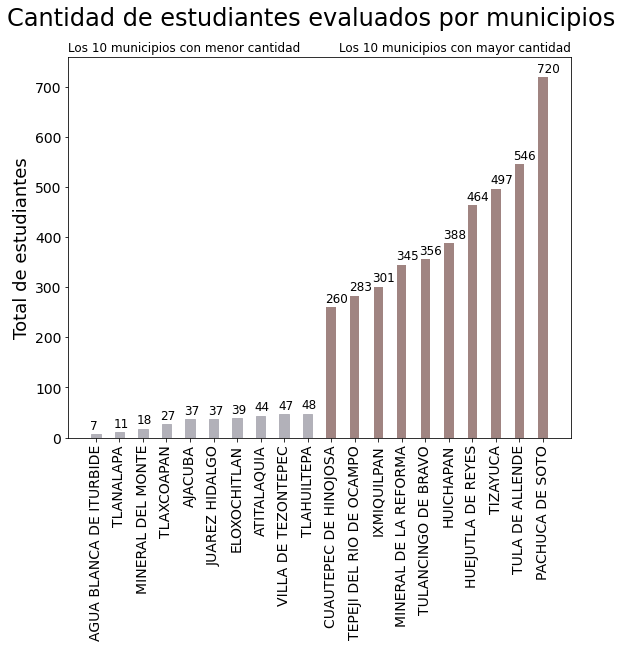

In [0]:
titulo = "Cantidad de estudiantes evaluados por municipios"
titulo_izquierda = "Los 10 municipios con menor cantidad"
titulo_derecha = "Los 10 municipios con mayor cantidad"


histograma(municipos_mayores_menores,titulo,titulo_izquierda,titulo_derecha,y_lim=760,posicion_altura=10)


In [0]:
niveles = ['I','II','III','IV']
niv = [1,2,3,4]

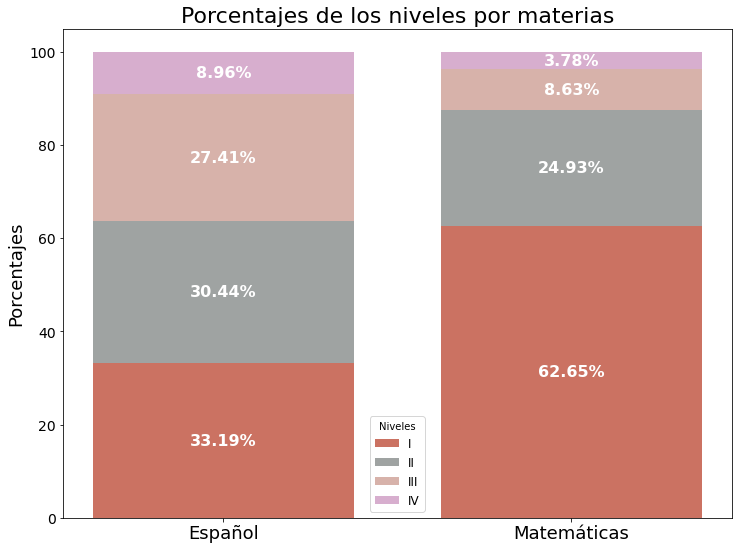

In [0]:
# Cabe destacar que nos basaremos en colores conforme a la psicología del color

color_reflexivo = '#B2B1B9'

color_nivel_I = '#CB7262' # peligro (rojo)
color_nivel_II = '#9FA3A2' # abrazame (azul) (Hacemos la analogia de que requiere apoyo)
color_nivel_III = '#D7B2AA' # mérito (oro)
color_nivel_IV = '#D7AECE' # ilusion y ensueño

nivel_esp = frecuenciasPorGrupo(datos,'NVL_ESP')
nivel_mat = frecuenciasPorGrupo(datos,'NVL_MAT')

total_esp = sum(list(nivel_esp))
esp = list(np.array(nivel_esp)/total_esp*100)

total_mat = sum(list(nivel_mat))
mat = list(np.array(nivel_mat)/total_mat*100)

# Barras apiladas

materias = ['Español', 'Matemáticas']

nivel_1 = [esp[0],mat[0]]
nivel_2 = [esp[1],mat[1]]
nivel_3 = [esp[2],mat[2]]
nivel_4 = [esp[3],mat[3]]

porcentajes_niveles = [nivel_1,nivel_2,nivel_3,nivel_4]

color_nivel_I = '#CB7262' # peligro (rojo)
color_nivel_II = '#9FA3A2' # abrazame (azul) (Hacemos la analogia de que requiere apoyo)
color_nivel_III = '#D7B2AA' # mérito (oro)
color_nivel_IV = '#D7AECE' # ilusion y ensueño

colores_psic_color = [color_nivel_I,color_nivel_II,color_nivel_III,color_nivel_IV]
graficadeDeBarrasApiladaEnPorcentaje(materias,porcentajes_niveles,colores_psic_color,niveles)

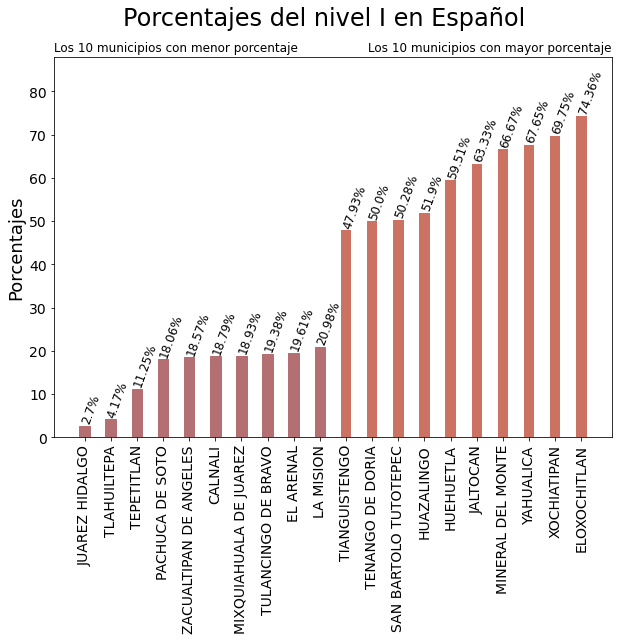

In [0]:
color_menor_I = '#B46F72' # prohibido (rojo)
color_mayor_I = '#CB7262' # peligro (rojo)

histogramaPorcentajeMunicipiosPorNivel(datos,"Español",'I',municipio,88,color_menor_I,color_mayor_I,posicion_altura=.741,posicion_lados=-0.2)

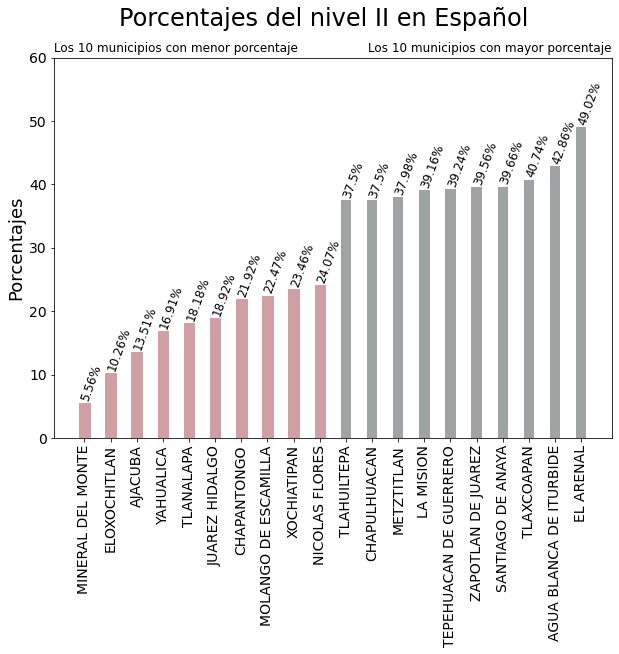

In [0]:

color_menor_II = '#D09FA3' # inadecuado (naranja)
color_mayor_II = '#9FA3A2' # abrazame (rojo)


histogramaPorcentajeMunicipiosPorNivel(datos,"Español",'II',municipio,60,color_menor_II,color_mayor_II,posicion_altura=0.508,posicion_lados=-0.2)

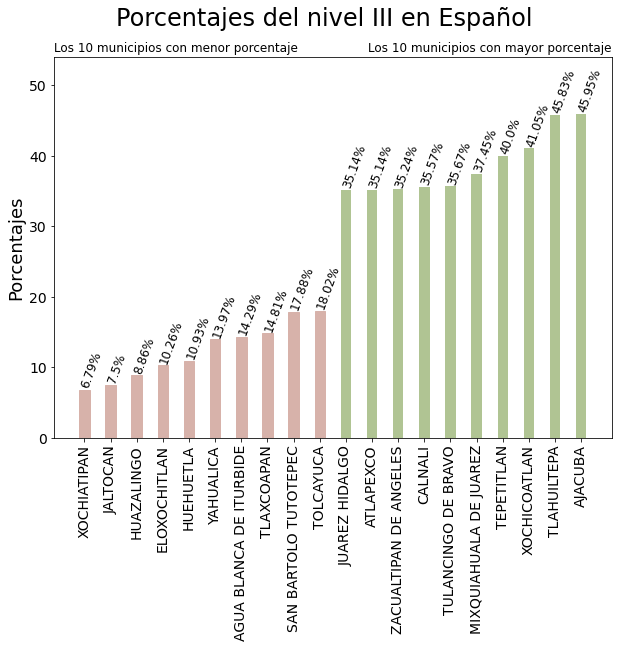

In [0]:
color_menor_III = '#D7B2AA' # mérito (oro)
color_mayor_III = '#B0C493' # optimismo (verde)

histogramaPorcentajeMunicipiosPorNivel(datos,"Español",'III',municipio,54,color_menor_III,color_mayor_III,posicion_altura=0.43,posicion_lados=-0.2)

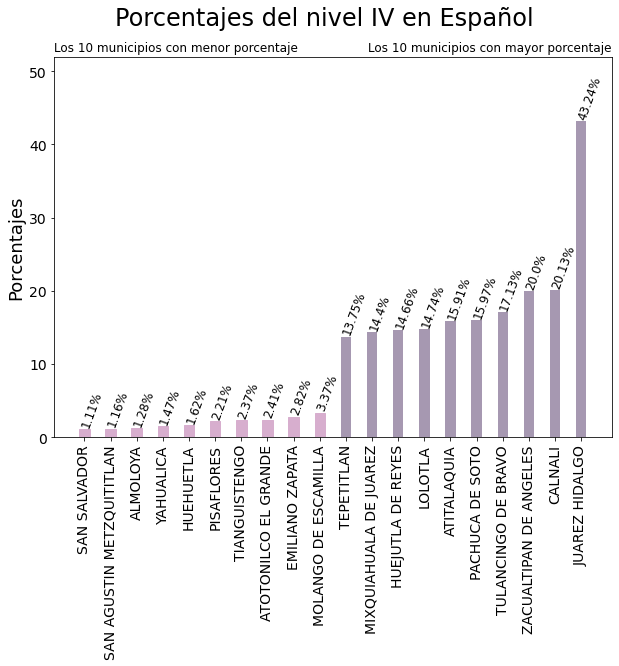

In [0]:
color_menor_IV = '#D7AECE' # ilusion y ensueño
color_mayor_IV = '#A698B1' # anhelo

histogramaPorcentajeMunicipiosPorNivel(datos,"Español",'IV',municipio,52,color_menor_IV,color_mayor_IV,posicion_altura=0.43,posicion_lados=-0.2)

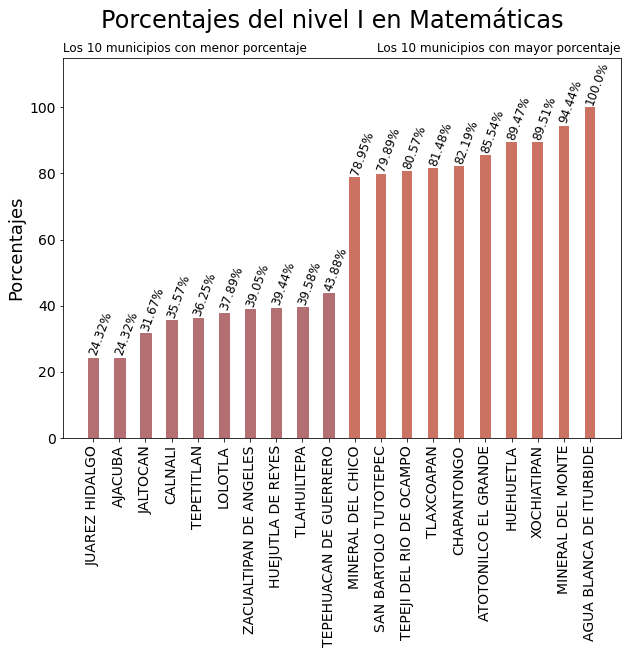

In [0]:
histogramaPorcentajeMunicipiosPorNivel(datos,"Matemáticas",'I',municipio,115,color_menor_I,color_mayor_I,posicion_altura=1.0,posicion_lados=-0.25)

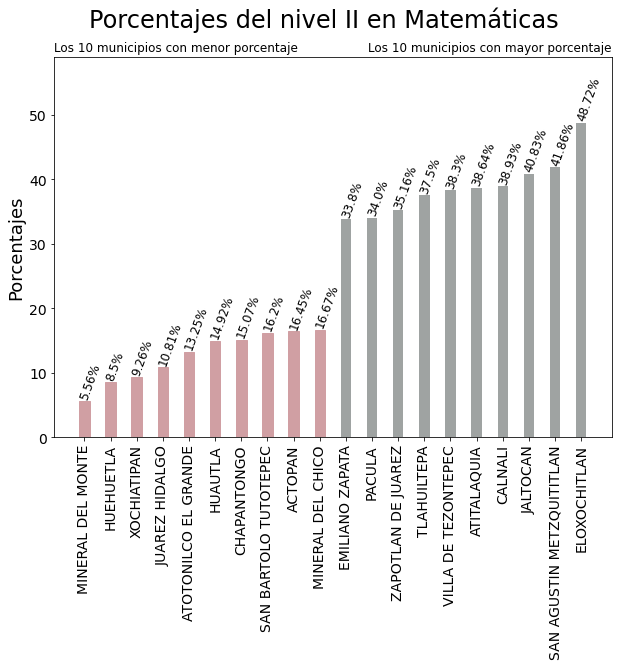

In [0]:
histogramaPorcentajeMunicipiosPorNivel(datos,"Matemáticas",'II',municipio,59,color_menor_II,color_mayor_II,posicion_altura=0.53,posicion_lados=-0.25)

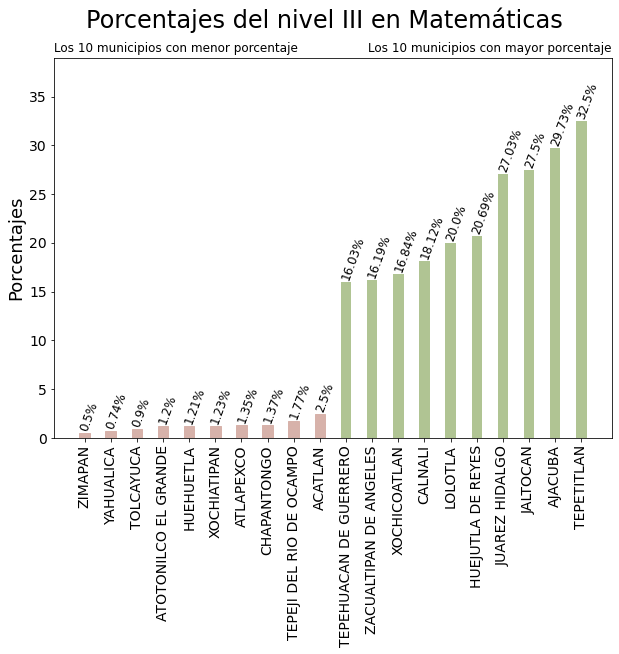

In [0]:
histogramaPorcentajeMunicipiosPorNivel(datos,"Matemáticas",'III',municipio,39,color_menor_III,color_mayor_III,posicion_altura=0.3,posicion_lados=-0.25)

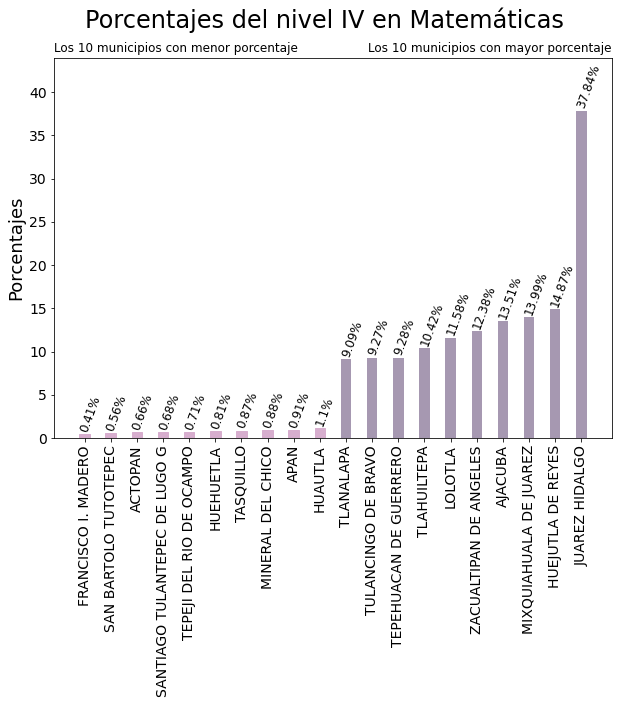

In [0]:
histogramaPorcentajeMunicipiosPorNivel(datos,"Matemáticas",'IV',municipio,44,color_menor_IV,color_mayor_IV,posicion_altura=0.4,posicion_lados=-0.25)

In [0]:
genero = porcentajesPorGrupo(datos,'GENERO', ['H','M'])
colores = ['blue','pink']
categorias = ['hombres','mujeres']
marcadores = [u'$\u2642$',u'$\u2640$']



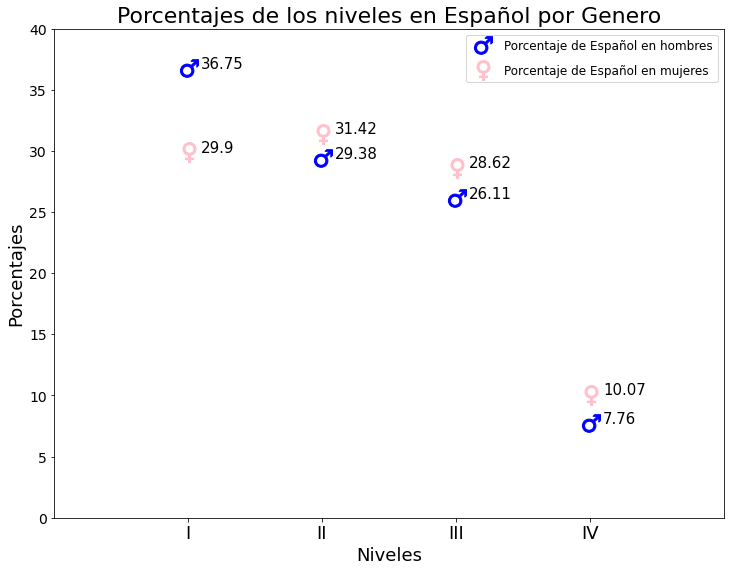

In [0]:
graficaDeFiguras(genero[0],colores, marcadores,20,'Genero',categorias ,'Español',niv,niveles,5,40)

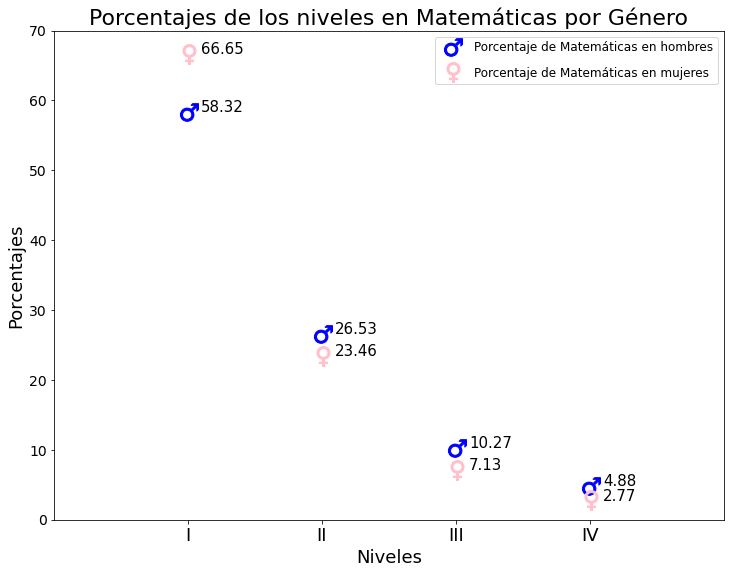

In [0]:
graficaDeFiguras(genero[1],colores, marcadores,20,'Género',categorias ,'Matemáticas',niv,niveles,5,70)

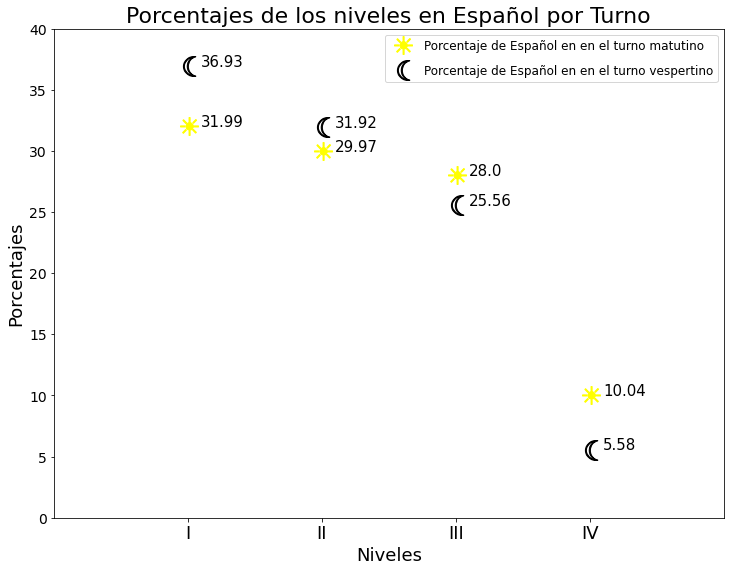

In [0]:
categorias = ['en el turno matutino','en el turno vespertino']
turno = porcentajesPorGrupo(datos,'N_TURNO', ['MATUTINO','VESPERTINO'])
marcadores = [u'$\u2600$',u'$\u263E$']
colores = ['yellow','black']
graficaDeFiguras(turno[0],colores,marcadores,20,'Turno',categorias,'Español',niv,niveles,5,40)

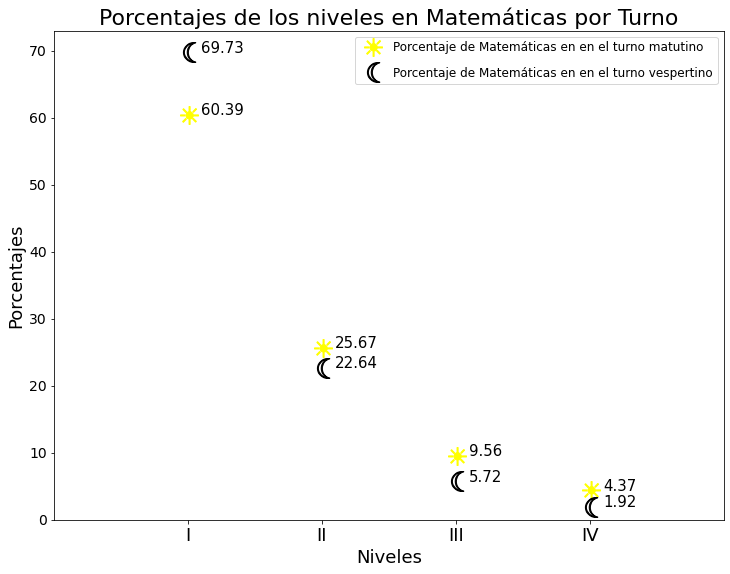

In [0]:
graficaDeFiguras(turno[1],colores,marcadores,20,'Turno',categorias,'Matemáticas',niv,niveles,5,73)


In [0]:
colores = ['k','g','r','c','m','silver','brown','y','b','pink']


In [0]:
zonas_marginadas_categorias = ['MUY ALTO','ALTO','MEDIO', 'BAJO','MUY BAJO']
procentaje_zonas_marginadas = porcentajesPorGrupo(datos,'MARGINA', zonas_marginadas_categorias)
variable = 'Zona Marginada'
categorias = zonas_marginadas_categorias


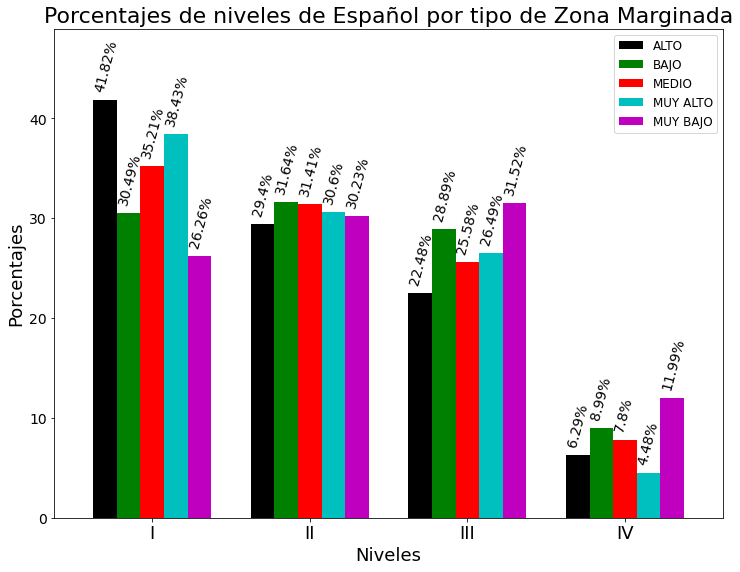

In [0]:
graficaDeBarrasAgrupadas(variable,categorias,procentaje_zonas_marginadas[0],'Español',niveles,colores,y_lim=49,posicion_lados=-0.005,posicion_altura=1,rotacion=75)

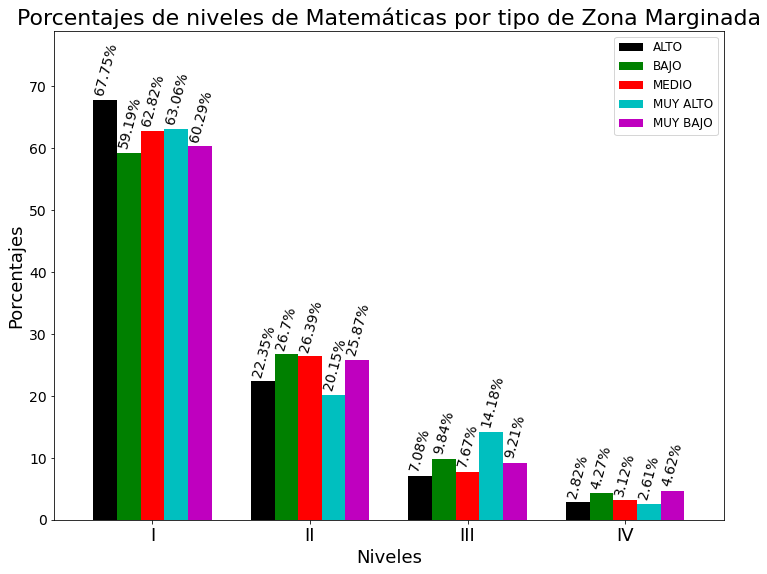

In [0]:
graficaDeBarrasAgrupadas(variable,categorias,procentaje_zonas_marginadas[1],'Matemáticas',niveles,colores,y_lim=79,posicion_lados=-0.005,posicion_altura=1,rotacion=75)

In [0]:
categorias_subsist = ['CECYTE','COBACH','CONALEP EDOS','DGB','DGETA','DGETI','EMSAD','PARTICULARES','PREFECOS','TELEBACHILLERATOS COMUNITARIOS']
porcentaje_subsist = porcentajesPorGrupo(datos,'SUBSIST', categorias_subsist)
variable = 'Servicio'
categorias = categorias_subsist

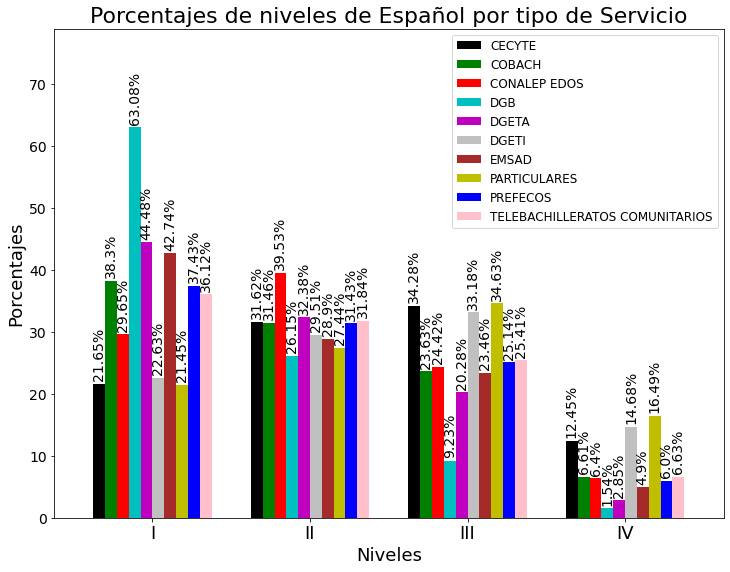

In [0]:
graficaDeBarrasAgrupadas(variable,categorias,porcentaje_subsist[0],'Español',niveles,colores,y_lim=79,posicion_lados=-.007,posicion_altura=1,rotacion='vertical')

In [0]:
porcentaje_subsist[1][3] = list(porcentaje_subsist[1][3])
porcentaje_subsist[1][3].append(0.0)
porcentaje_subsist = np.array(porcentaje_subsist)

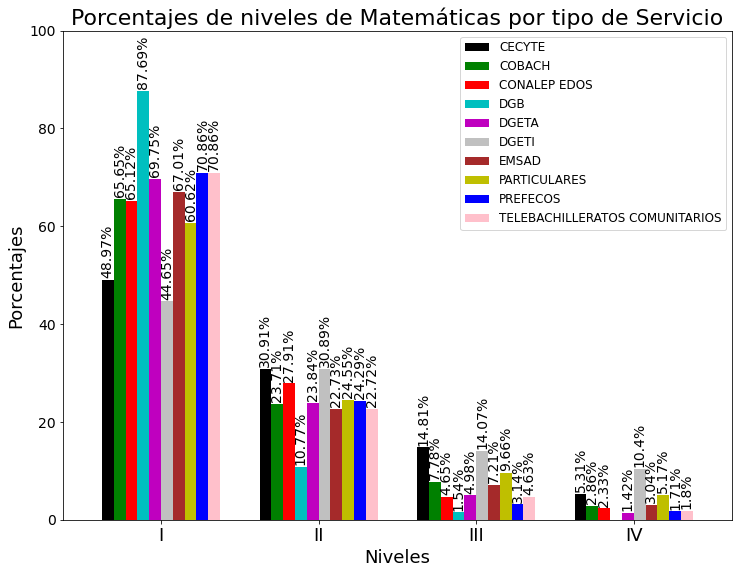

In [0]:
graficaDeBarrasAgrupadas(variable,categorias,porcentaje_subsist[1],'Matemáticas',niveles,colores,y_lim=100,posicion_lados=-.007,posicion_altura=1,rotacion='vertical')

In [0]:
categorias_sost = ['ESTATAL','FEDERAL','PARTICULAR']
porcentaje_sost = porcentajesPorGrupo(datos,'SOST', categorias_sost)
variable = 'Control Administrativo'
categorias = categorias_sost

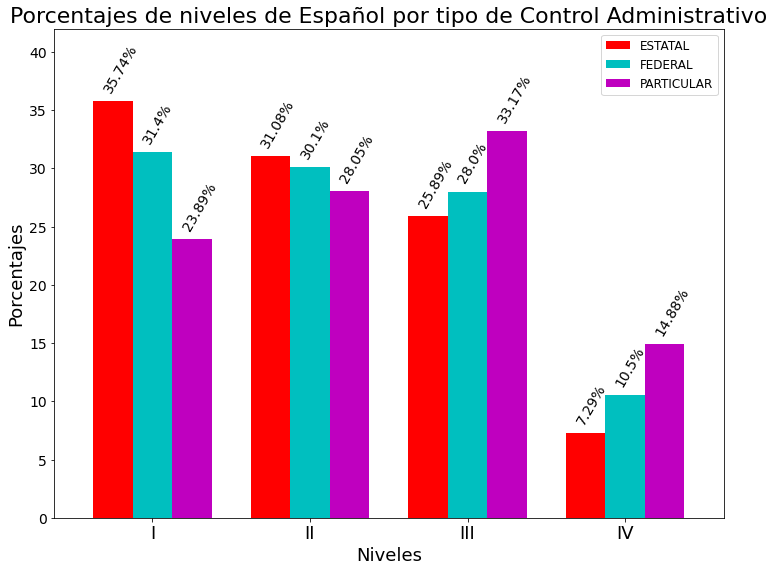

In [0]:
graficaDeBarrasAgrupadas(variable,categorias,porcentaje_sost[0],'Español',niveles,colores[2:6],y_lim=42,posicion_altura=0.8,rotacion=60)

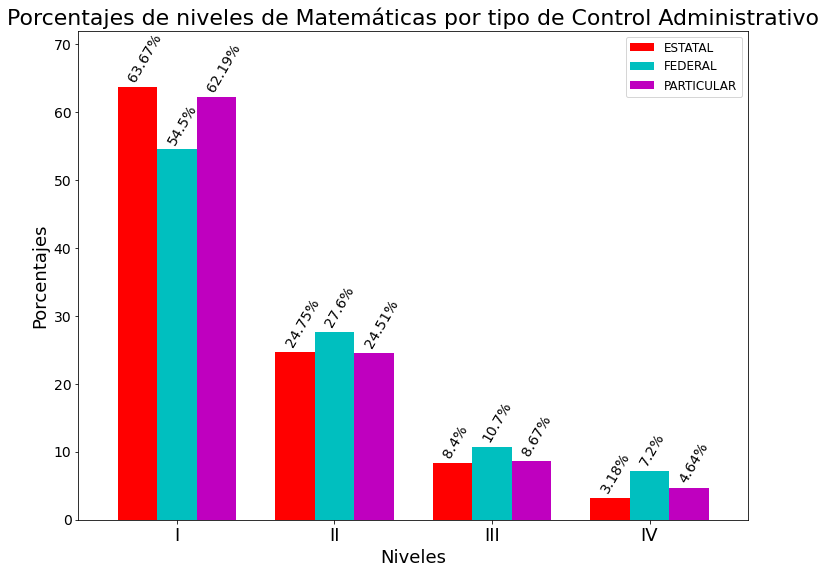

In [0]:
graficaDeBarrasAgrupadas(variable,categorias,porcentaje_sost[1],'Matemáticas',niveles,colores[2:6],y_lim=72,posicion_altura=0.8,rotacion=60)